In [1]:
import pandas as pd
from gemelli.rpca import feature_correlation_table
from biom import load_table
import numpy as np
import glob
import json
from skbio import OrdinationResults
from biom import load_table

import matplotlib.patches as mpatches
from scipy.stats import kruskal
from matplotlib.pyplot import cm
from matplotlib.colors import to_hex
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import tables

In [2]:
ord_joint = OrdinationResults.read('../results/joint-rpca/Original/ord.txt')
#ord_joint = OrdinationResults.read('../results/joint-rpca/Ordinations/joint_ord_4PCs.txt')
ord_joint_feats = ord_joint.features.copy()
axis_use = 1 # use PC2
# import tables data 
metadata_subset = pd.read_csv('../network/split-matched-data/metadata.tsv', sep='\t', index_col=0)
tables = {}
for table_ in glob.glob('../network/split-matched-data/*.biom'):
    if '16S' in table_:
        continue
    if 'gene.biom' in table_:
        continue
    bt_tmp = load_table(table_)
    bt_tmp_df = pd.DataFrame(bt_tmp.matrix_data.toarray(), bt_tmp.ids('observation'), bt_tmp.ids())
    bt_tmp_df = bt_tmp_df[metadata_subset.index]
    id_set = set(ord_joint_feats.index) & set(bt_tmp.ids('observation'))
    ord_joint_feats_tmp = ord_joint_feats.loc[list(id_set), :]
    ord_joint_feats_tmp = ord_joint_feats_tmp.sort_values(by=axis_use)
    tables[table_.split('/')[-1].split('.')[0]] = [bt_tmp, bt_tmp_df, ord_joint_feats_tmp]
tables.keys()

dict_keys(['metabolite', 'mag', '18S', 'gene_module', 'metabolomics'])

In [3]:
# annots for tables
taxonomy_18s = pd.read_csv('../network/annotations/18S_taxonomy.tsv', sep='\t', index_col=0)
taxonomy_18s = {k:{z.split('__')[0]:z.split('__')[-1]
               for z in x.split(';')} for k, x in zip(taxonomy_18s.index, taxonomy_18s.Taxon.values)}
taxonomy_18s = pd.DataFrame(taxonomy_18s).T
taxonomy_18s_nosp = taxonomy_18s.drop([' s'], axis=1)

taxonomy_mag = pd.read_csv('../network/annotations/MAG_taxonomy.tsv', sep='\t', index_col=0)
taxonomy_mag = {k:{z.split('__')[0]:z.split('__')[-1]
               for z in x.split(';')} for k, x in zip(taxonomy_mag.index, taxonomy_mag.Taxon.values)}
taxonomy_mag = pd.DataFrame(taxonomy_mag).T
taxonomy_mag[taxonomy_mag == ''] = np.nan

In [4]:
metab_ids = pd.read_excel('../network/metabolite_formulas.xlsx', index_col=0)
metab_ids.index = ['metab_' + str(x) for x in metab_ids.index]
metab_ids_class = metab_ids.dropna(subset=['most specific class'])

bt_tmp, df_tmp, ord_tmp = tables['metabolite']
keep_metab = set(metab_ids_class.index) & set(bt_tmp.ids('observation'))
bt_tmp = bt_tmp.filter(keep_metab, axis='observation')
df_tmp = df_tmp.loc[list(keep_metab), :]
ord_tmp = ord_tmp.loc[list(keep_metab), :].sort_values(by=axis_use)
tables['metabolite'] = [bt_tmp, df_tmp, ord_tmp]

In [5]:
feature_feature_correlation = feature_correlation_table(ord_joint)
feature_feature_correlation.head(5)

featureid   metab_1   metab_2   metab_3   metab_4   metab_5   metab_6  \
featureid                                                               
metab_1    1.000000  0.950286  0.101352  0.984747  0.420760  0.122384   
metab_2    0.950286  1.000000 -0.175955  0.889841  0.122672  0.355225   
metab_3    0.101352 -0.175955  1.000000  0.196816  0.742522 -0.956283   
metab_4    0.984747  0.889841  0.196816  1.000000  0.560452  0.052777   
metab_5    0.420760  0.122672  0.742522  0.560452  1.000000 -0.524905   

featureid   metab_9  metab_10  metab_11  metab_12  ...  \
featureid                                          ...   
metab_1    0.918941 -0.269318 -0.473904 -0.334884  ...   
metab_2    0.842529  0.009973 -0.203890 -0.361493  ...   
metab_3    0.347035 -0.946683 -0.891130  0.518662  ...   
metab_4    0.904753 -0.350563 -0.575702 -0.383619  ...   
metab_5    0.424393 -0.798595 -0.863812 -0.179348  ...   

featureid  sp|Q4Z9G3|PORTL_BPTWO_Probable_portal_protein;_XpXrXs  \
featureid                                                          
metab_1                                            -0.980094       
metab_2                                            -0.940898       
metab_3                                            -0.064148       
metab_4                                            -0.949564       
metab_5                                            -0.376901       

featureid  sp|Q52118|YMO3_PANSE_Uncharacterized_protein_in_mobD_3'region;_Xh  \
featureid                                                                      
metab_1                                             0.140919                   
metab_2                                            -0.058314                   
metab_3                                             0.188248                   
metab_4                                             0.277633                   
metab_5                                             0.732394                   

featureid  sp|Q5PLI4|DGCQ_SALPA_Probable_diguanylate_cyclase_DgcQ;_Xh  \
featureid                                                               
metab_1                                             0.463914            
metab_2                                             0.216892            
metab_3                                             0.714083            
metab_4                                             0.589625            
metab_5                                             0.851382            

featureid  sp|Q5UQ90|YL532_MIMIV_Cytochrome_P450-like_protein_L532;_XhXs  \
featureid                                                                  
metab_1                                            -0.012220               
metab_2                                            -0.278941               
metab_3                                             0.576518               
metab_4                                             0.161888               
metab_5                                             0.839965               

featureid  sp|Q5UQG2|YL498_MIMIV_Probable_zinc-type_alcohol_dehydrogenase-like_protein_L498;_XhXs  \
featureid                                                                                           
metab_1                                             0.311884                                        
metab_2                                             0.070982                                        
metab_3                                             0.384673                                        
metab_4                                             0.464779                                        
metab_5                                             0.883150                                        

featureid  sp|Q5UQI9|YR836_MIMIV_Uncharacterized_protein_R836;_Xu  \
featureid                                                           
metab_1                                            -0.108284        
metab_2                                             0.066470        
metab_3       

# analysis


In [6]:
for modality, (_, table_, ranks_) in tables.items():
    print(modality, table_.shape)

metabolite (267, 374)
mag (257, 374)
18S (5473, 374)
gene_module (377, 374)
metabolomics (2333, 374)


In [7]:
# make each log-ratio based on axis
#quantile_use = 0.1
features_used_all = {}
lr_cols = []
metadata_logratios = metadata_subset.copy()
i_ = 19
for modality, (_, table_, ranks_) in tables.items():
    #for i_ in range(1, 1500):
    num = list(ranks_.iloc[:i_, :].index)
    den = list(ranks_.iloc[-i_:, :].index)
    features_used_all[modality] = [num[:i_], den[:i_]]

In [8]:
with open("../results/joint-rpca/Original/joint_decomposer_feats.json", "w") as outfile: 
    json.dump(features_used_all, outfile)

In [17]:
##ORIGINAL##
# make each log-ratio based on axis
#quantile_use = 0.1
features_used_all = {}
lr_cols = []
metadata_logratios = metadata_subset.copy()
for modality, (_, table_, ranks_) in tables.items():
    for i_ in range(1, 1500):
        num = ranks_.iloc[:i_, :].index
        den = ranks_.iloc[-i_:, :].index
        features_used_all[modality] = [num[:19], den[:19]]
        #features_used_all[modality] = [num[:i_], den[:i_]]
        lr_ = np.log(table_.loc[num, :].sum(0)) - np.log(table_.loc[den, :].sum(0))
        if (sum(np.isfinite(lr_)) / table_.shape[1]) >= 0.99:
            break
    print(modality, i_)
    print(sum(np.isfinite(lr_)) / table_.shape[1])
    lr_[~np.isfinite(lr_)] = np.nan
    metadata_logratios[modality + '_logratio'] = lr_
    lr_cols.append(modality + '_logratio')

metabolite 71
0.9973262032085561
mag 14
0.9919786096256684
18S 1499
0.8636363636363636
gene_module 4
0.9946524064171123
metabolomics 30
0.9919786096256684


In [ ]:
# #results from original code
# #metabolite
# 238
# 1.0
# #mag
# 30
# 0.9919786096256684
# #18S
# 1499
# 0.9010695187165776
# #gene_module
# 26
# 1.0

In [9]:
#get individual rpca version
ord_18S = OrdinationResults.read('../results/joint-rpca/Original/18S_ord.txt')
ord_mag = OrdinationResults.read('../results/joint-rpca/Original/mag_ord.txt')
ord_gene_module = OrdinationResults.read('../results/joint-rpca/Original/gene_module_ord.txt')
ord_metabolite = OrdinationResults.read('../results/joint-rpca/Original/metabolite_ord.txt')
ord_metabolomics = OrdinationResults.read('../results/joint-rpca/Original/metabolomics_ord.txt')
ords_rpca = {'metabolite': ord_metabolite, 'mag': ord_mag, '18S': ord_18S, 
             'gene_module': ord_gene_module, 'metabolomics': ord_metabolomics}
axis_use_rpca = {'metabolite': 1, 'mag': 2, '18S': 2,
                 'gene_module': 1, 'metabolomics': 1}

#create new dict with rpca ordinations
tables_rpca = tables.copy()
for omic in tables_rpca.keys():

    omic_features = ords_rpca[omic].features.copy()
    id_set = set(omic_features.index) & set(tables[omic][0].ids('observation'))
    omic_features_tmp = omic_features.loc[list(id_set), :]
    
    axis_use_ = axis_use_rpca[omic]
    tables_rpca[omic][2] = omic_features_tmp.sort_values(by=axis_use_)

In [19]:
# make each log-ratio based on axis
features_used_rpca = {}
metadata_logratios_rpca = metadata_subset.copy()
lr_cols = []
i_ = 19
for modality, (_, table_, ranks_) in tables_rpca.items():
    for i_ in range(1, 1500):
        num = list(ranks_.iloc[:i_, :].index)
        den = list(ranks_.iloc[-i_:, :].index)
        features_used_rpca[modality] = [num[:19], den[:19]]
        lr_ = np.log(table_.loc[num, :].sum(0)) - np.log(table_.loc[den, :].sum(0))
        if (sum(np.isfinite(lr_)) / table_.shape[1]) >= 0.99:
            break
    print(modality, i_)
    print(sum(np.isfinite(lr_)) / table_.shape[1])
    lr_[~np.isfinite(lr_)] = np.nan
    metadata_logratios_rpca[modality + '_logratio'] = lr_
    lr_cols.append(modality + '_logratio')

metabolite 71
0.9973262032085561
mag 14
0.9919786096256684
18S 1499
0.8636363636363636
gene_module 4
0.9946524064171123
metabolomics 30
0.9919786096256684


In [22]:
#save features_used_all## 
with open("../results/joint-rpca/Original/rpca_decomposer_feats2.json", "w") as outfile: 
    json.dump(features_used_rpca, outfile)

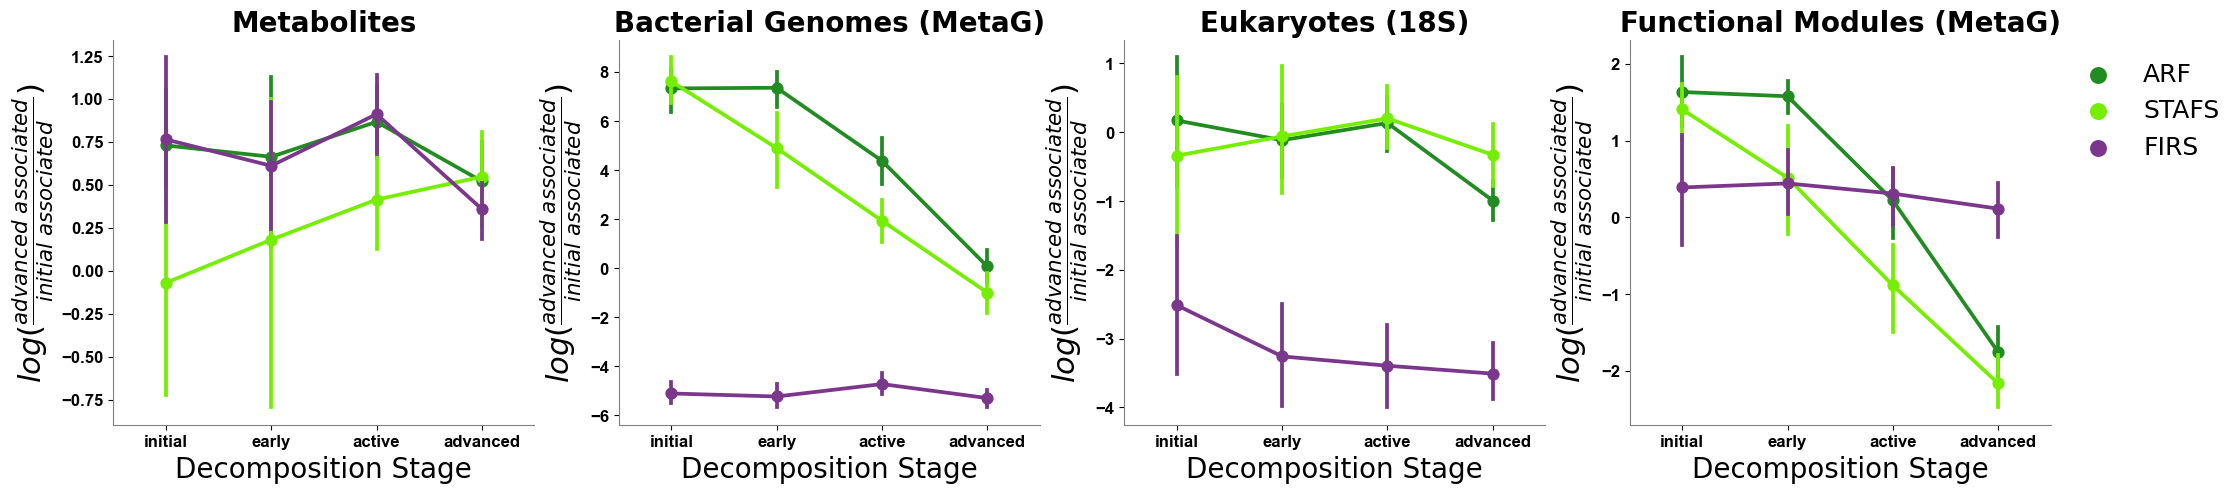

In [21]:
fig, axn = plt.subplots(1, 4, figsize=(5*5, 5))

titles_ =  {'mag_logratio':'Bacterial Genomes (MetaG)',
            '18S_logratio':'Eukaryotes (18S)',
            'gene_module_logratio':'Functional Modules (MetaG)',
            'metabolite_logratio':'Metabolites'}

palette=["#228b22","#76ee00","#7a378b"]

for ax, lr_ in zip(axn, lr_cols):

    #metadata_logratios[lr_] = -1*metadata_logratios[lr_]
    sns.pointplot(x='add_0c_group', y=lr_, hue='facility', 
                  hue_order = ['ARF', 'STAFS', 'FIRS'], palette=palette,
                  order = ['initial', 'early', 'active', 'advanced'],
                  data=metadata_logratios_rpca, ax=ax)
    ax.set_xlabel('Decomposition Stage', color='black', fontsize=20)
    ax.set_ylabel('$log(\\frac{advanced\,\,associated}{initial\,\,associated})$',
                  color='black', weight='bold', fontsize=22)
    ax.set_title(titles_[lr_], color='black', weight='bold', fontsize=20)

    # fix backround
    ax.set_facecolor('white')
    ax.set_axisbelow(True)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['top'].set_visible(False)
    for child in ax.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color('grey')
    for tick in ax.get_yticklabels():
        tick.set_fontproperties('arial')
        tick.set_weight('bold')
        tick.set_color("black")
        tick.set_fontsize(12)
    for tick in ax.get_xticklabels():
        tick.set_fontproperties('arial')
        tick.set_weight('bold')
        tick.set_color("black")
        tick.set_fontsize(12)
    ax.legend_.remove()

legend = ax.legend(loc=2, bbox_to_anchor=(1, 1), prop={'size':18}, title="",
                  fancybox=True, framealpha=.0, ncol=1, markerscale=1.5)
legend.get_title().set_fontsize('16')
# increase the line width in the legend 
for line in legend.get_lines()[:]:
    line.set_linewidth(2.0)
for line in legend.get_lines()[:]:
    line.set_linewidth(2.0)

# plt.savefig('../results/figures/rpca-log-ratios.png',
#             dpi=600, 
#             bbox_inches='tight',
#             edgecolor='none')
plt.show()

In [13]:
# make sure no overlap
{k_:set(v1) & set(v2) for k_, (v1, v2) in features_used_all.items()}

{'metabolite': set(),
 'mag': set(),
 '18S': set(),
 'gene_module': set(),
 'metabolomics': set()}

In [ ]:
#metadata_logratios.to_csv('../results/joint-rpca/metadata_w_log_ratios.csv')

# initial associated

In [26]:
all_features = set([v_ for k_, (v1, v2) in features_used_all.items()
                    for v_ in list(v2)]) & set(feature_feature_correlation.index)
feature_feature_correlation_subset = feature_feature_correlation.loc[list(all_features), list(all_features)]
feature_feature_correlation_subset.shape

(87, 87)

In [40]:
new_index = []
modality_map = {}
association_map = {}

nums_all = [v_ for k, v in features_used_all.items() for v_ in v[0]]
dens_all = [v_ for k, v in features_used_all.items() for v_ in v[1]]

for ind_ in feature_feature_correlation_subset.index:
    if ind_ in taxonomy_18s_nosp.index:
        label_ = taxonomy_18s_nosp.loc[ind_, :].dropna()
        label_ = label_.values[-1] + ' (' + label_.index[-1] + ')'
        new_index.append(label_)
        modality_map[label_] = 'Eukaryotes (18S)'
        if ind_ in nums_all:
            association_map[label_] = 'day zero'
        else:
            association_map[label_] = 'advanced'
    elif ind_ in taxonomy_mag.index:
        label_ = taxonomy_mag.loc[ind_, :].dropna()
        label_ = label_.values[-1] + ' (' + label_.index[-1] + ')'
        new_index.append(label_)
        modality_map[label_] = 'Bacterial Genomes (MetaG)'
        if ind_ in nums_all:
            association_map[label_] = 'day zero'
        else:
            association_map[label_] = 'advanced'
    elif ind_ in metab_ids.index:
        new_index.append(metab_ids.loc[ind_, 'most specific class'])
        modality_map[metab_ids.loc[ind_, 'most specific class']] = 'Metabolites'
        if ind_ in nums_all:
            association_map[metab_ids.loc[ind_, 'most specific class']] = 'day zero'
        else:
            association_map[metab_ids.loc[ind_, 'most specific class']] = 'advanced'
    else:
        new_index.append(ind_)
        if ind_ in nums_all:
            association_map[ind_] = 'day zero'
        else:
            association_map[ind_] = 'advanced'
        if ind_ in tables['mag'][1].index:
            modality_map[ind_] = 'Bacterial Genomes (MetaG)'
        elif ind_ in tables['18S'][1].index:
            modality_map[ind_] = 'Eukaryotes (18S)'
        elif ind_ in tables['gene_module'][1].index:
            modality_map[ind_] = 'Functions (MetaG)'
        #elif ind_ in tables['gene'][1].index:
        #    modality_map[ind_] = 'Metagenomics (genes)'
        elif ind_ in tables['metabolite'][1].index:
            modality_map[ind_] = 'Metabolites'
        
# clean up
new_index = ['drop' if len(str(i_)) == 0 else i_ for i_ in new_index]
new_index = ['drop' if str(i_) == 'nan' else i_ for i_ in new_index]
#new_index = ['drop' if 'metab' in str(i_) else i_ for i_ in new_index]
new_index = [i_.replace('_',' ') for i_ in new_index]

# group
feature_feature_correlation_subset_relabel = feature_feature_correlation_subset.copy()
feature_feature_correlation_subset_relabel['new_label'] = new_index
old_to_new_index = dict(zip(feature_feature_correlation_subset_relabel.new_label, 
                            feature_feature_correlation_subset_relabel.index))
feature_feature_correlation_subset_relabel = feature_feature_correlation_subset_relabel.groupby('new_label').mean().T
feature_feature_correlation_subset_relabel['new_label'] = new_index
feature_feature_correlation_subset_relabel = feature_feature_correlation_subset_relabel.groupby('new_label').mean().T
feature_feature_correlation_subset_relabel.index.name = 'axis1'
feature_feature_correlation_subset_relabel.columns.name = 'axis2'
if 'drop' in feature_feature_correlation_subset_relabel.index: 
    feature_feature_correlation_subset_relabel = feature_feature_correlation_subset_relabel.drop(['drop'], axis=1).drop(['drop'], axis=0)
display(feature_feature_correlation_subset_relabel.head(5))

axis2                                       0DH:ubiquinone oxidoreductase mitochondria  \
axis1                                                                                    
0DH:ubiquinone oxidoreductase mitochondria                                    1.000000   
1,2-aminoalcohols                                                            -0.295125   
Acinetobacter (g)                                                             0.740543   
Acinetobacter baumannii B (s)                                                 0.576367   
Acinetobacter gerneri (s)                                                     0.598494   

axis2                                       1,2-aminoalcohols  \
axis1                                                           
0DH:ubiquinone oxidoreductase mitochondria          -0.295125   
1,2-aminoalcohols                                    1.000000   
Acinetobacter (g)                                   -0.842441   
Acinetobacter baumannii B (s)                       -0.939238   
Acinetobacter gerneri (s)                           -0.938405   

axis2                                       Acinetobacter (g)  \
axis1                                                           
0DH:ubiquinone oxidoreductase mitochondria           0.740543   
1,2-aminoalcohols                                   -0.842441   
Acinetobacter (g)                                    1.000000   
Acinetobacter baumannii B (s)                        0.973215   
Acinetobacter gerneri (s)                            0.975802   

axis2                                       Acinetobacter baumannii B (s)  \
axis1                                                                       
0DH:ubiquinone oxidoreductase mitochondria                       0.576367   
1,2-aminoalcohols                                               -0.939238   
Acinetobacter (g)                                                0.973215   
Acinetobacter baumannii B (s)                                    1.000000   
Acinetobacter gerneri (s)                                        0.997721   

axis2                                       Acinetobacter gerneri (s)  \
axis1                                                                   
0DH:ubiquinone oxidoreductase mitochondria                   0.598494   
1,2-aminoalcohols                                           -0.938405   
Acinetobacter (g)                                            0.975802   
Acinetobacter baumannii B (s)                                0.997721   
Acinetobacter gerneri (s)                                    1.000000   

axis2                                       Acinetobacter rudis (s)  \
axis1                                                                 
0DH:ubiquinone oxidoreductase mitochondria                 0.742242   
1,2-aminoalcohols                                         -0.391894   
Acinetobacter (g)                                          0.752129   
Acinetobacter baumannii B (s)                              0.623729   
Acinetobacter gerneri (s)                                  0.620810   

axis2                                       Adhesin protein transport system  \
axis1                                                                          
0DH:ubiquinone oxidoreductase mitochondria                          0.859724   
1,2-aminoalcohols                                                  -0.534664   
Acinetobacter (g)                                                   0.883577   
Acinetobacter baumannii B (s)                                       0.765196   
Acinetobacter gerneri (s)                                           0.770130   

axis2                                       Agaricomycotina ( ps)  \
axis1                                                               
0DH:ubiquinone oxidoreductase mitochondria               0.777081   
1,2-aminoalcohols                                       -0.679350   
Acinetobacter (g)                                        0.816737   
A

In [17]:
#feature_feature_correlation_subset_relabel.to_csv('../results/joint-rpca/intial-associated-correlation.csv')

In [37]:

# Transform it in a links data frame (3 columns only):
links = feature_feature_correlation_subset_relabel.stack().reset_index()
links.columns = ['var1', 'var2', 'value']
 
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[(links.value.abs() > links.value.abs().quantile([0.8]).values[0]) \
                         & (links['var1'] != links['var2'])]
# Keep self loops
#links_filtered= pd.concat([links.loc[(links.value.abs() > links.value.abs().quantile([0.9]).values[0])], 
#                          links.loc[ (links['var1'] == links['var2'])]], axis=0)

links_filtered.shape

(940, 3)

In [45]:
color_map_list = set(modality_map.values())
colors = [to_hex(c) for c in cm.Set1_r(np.linspace(0, 1, len(color_map_list)))]
color_map = {k:v for k, v in zip(color_map_list, colors)}
modality_map_label = {str(k).replace('_',' '):v for k, v in modality_map.items()}
color_map['Functions (MetaG)'] = '#50C878' # green
color_map['Metabolites'] = '#CF9FFF' # purple
color_map['Bacterial Genomes (MetaG)'] = '#FF7518' # orange 
color_map['Eukaryotes (18S)'] = '#FF0000' # red
map_shape = {'advanced':400, 'day zero':100}
assoc_map_label = {str(k).replace('_',' '):map_shape[v] for k, v in association_map.items()}

In [46]:
unique_feats = links_filtered.var1.unique()
feats_to_remove = []

for feat in unique_feats:
    if feat not in modality_map_label.keys():
        feats_to_remove.append(feat)

print(feats_to_remove)
links_filtered = links_filtered[~links_filtered['var1'].isin(feats_to_remove)]
links_filtered = links_filtered[~links_filtered['var2'].isin(feats_to_remove)]

['metab 141', 'metab 1458', 'metab 156', 'metab 1885', 'metab 2163', 'metab 541', 'metab 679', 'metab 686']


In [47]:
print(links_filtered.var1.nunique())
print(links_filtered.var2.nunique())
print(len(modality_map_label.keys()))

60
60
64


In [57]:
unique_feats_to_keep = links_filtered.var1.unique()
#transform to original labels with old_to_new_index
unique_feats_original = [old_to_new_index[x] for x in links_filtered.var1.unique()]
#sanity check
print(unique_feats_to_keep[0:5])
print(unique_feats_original[0:5])

#save decomposer network features
pd.DataFrame(unique_feats_original).to_csv('../results/joint-rpca/decomposer_network_features_initial-associated.csv')

['0DH:ubiquinone oxidoreductase mitochondria' '1,2-aminoalcohols'
 'Acinetobacter (g)' 'Acinetobacter baumannii B (s)'
 'Acinetobacter gerneri (s)']
['0DH:ubiquinone_oxidoreductase_mitochondria', 'metab_2668', 'SHSU.bins.157', 'SHSU.bins.450', 'SHSU.bins.83']


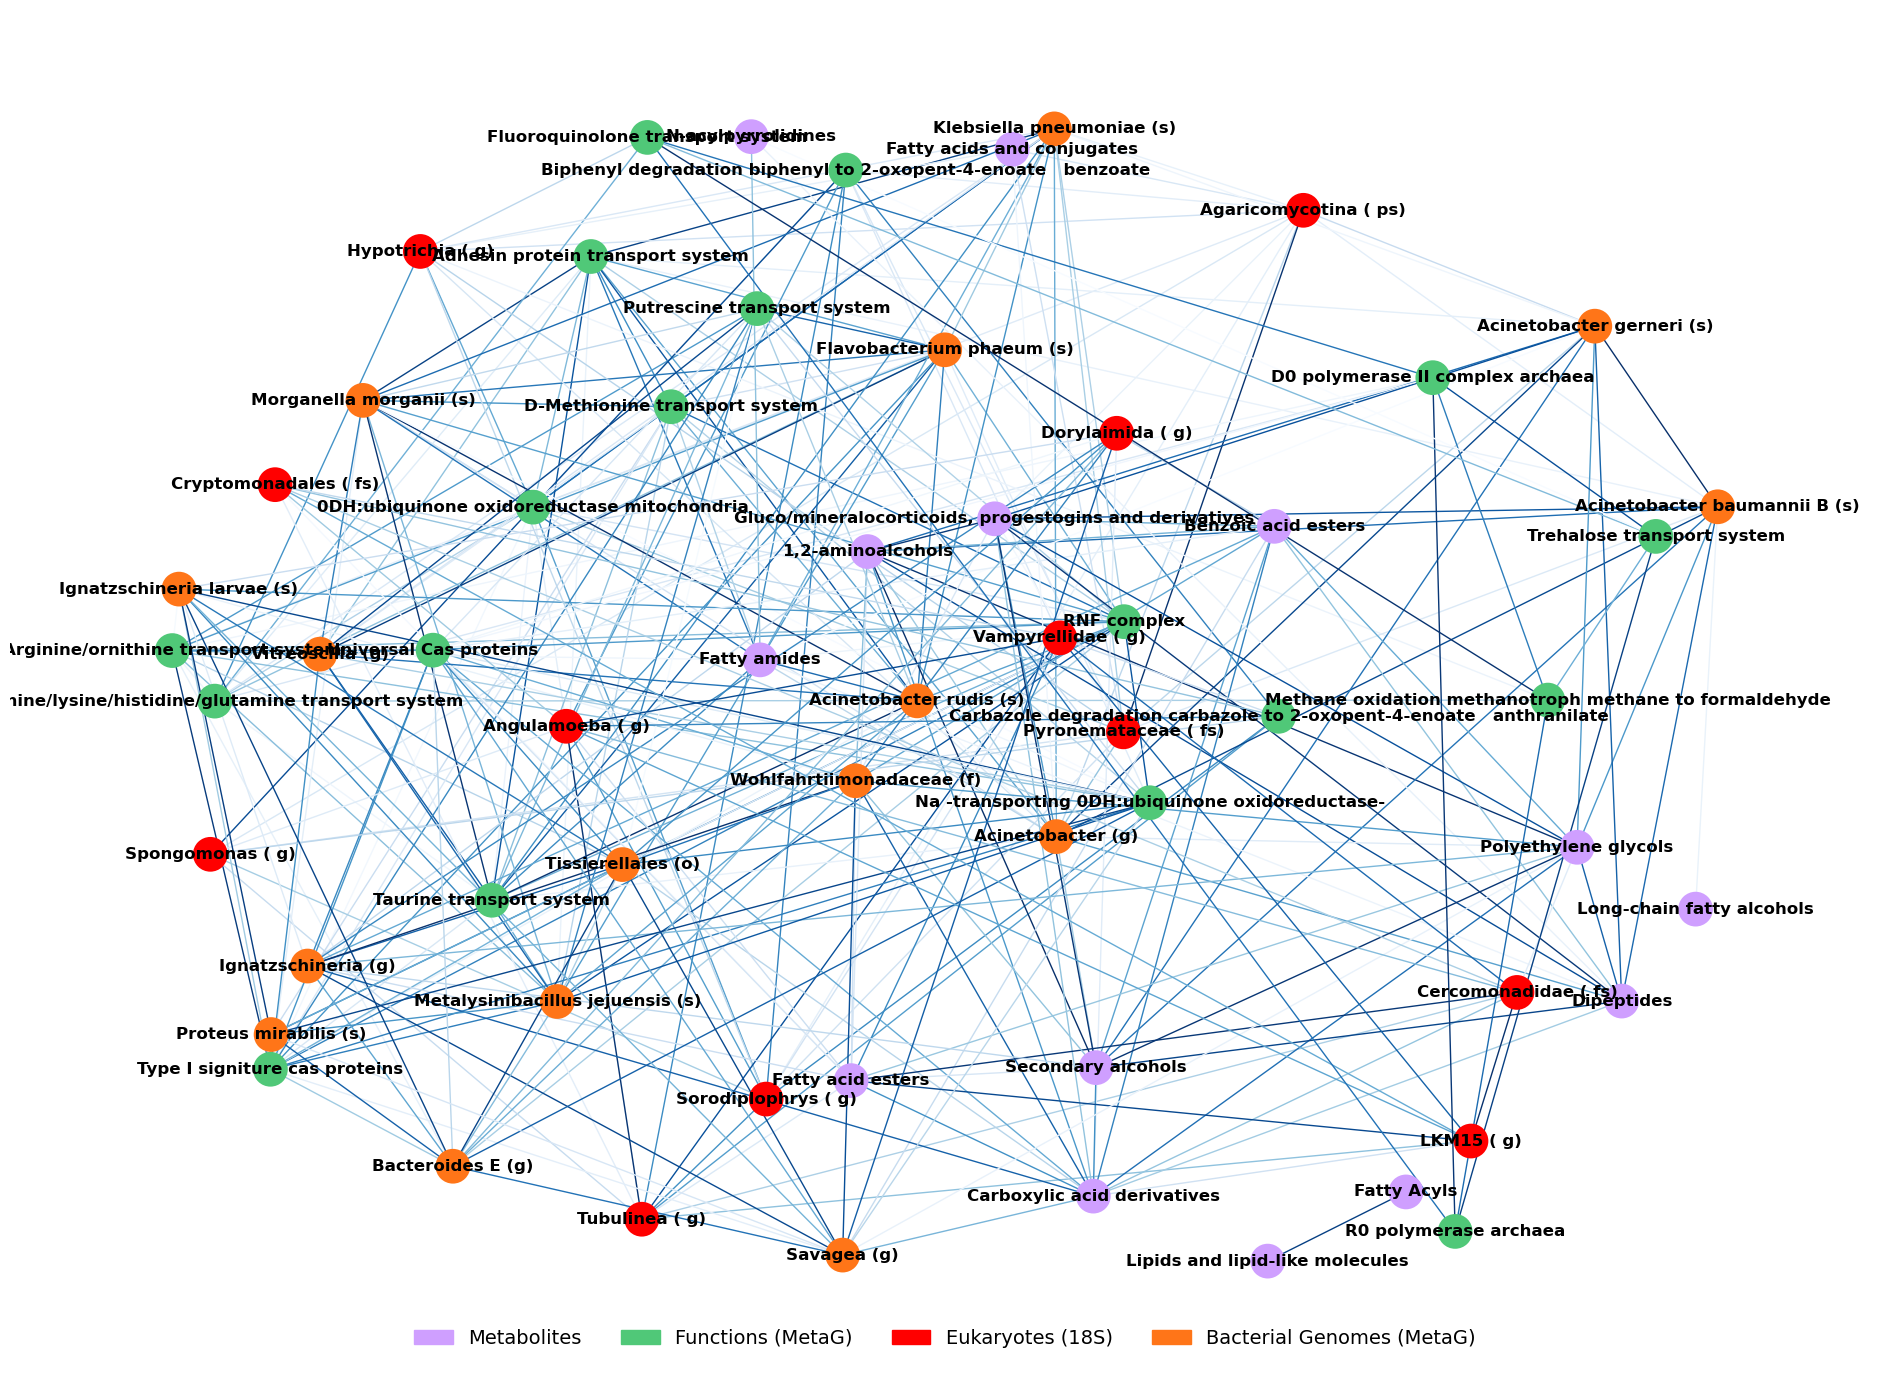

In [39]:
num_iterations = 20

for iteration in range(num_iterations):

    # Build your graph
    G = nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
    # Plot the network:
    values = range(links_filtered.shape[0])

    #pos = nx.kamada_kawai_layout(G)
    pos = nx.spring_layout(G, k=1.8)

    fig, ax = plt.subplots(1, 1, figsize=(19, 14)) 

    y_off = 3

    nx.draw(G, with_labels=True,
            pos = {k:([v[0], v[1]+y_off]) for k,v in pos.items()},
            node_color=[color_map[modality_map_label[node[0]]]
                        for node in G.nodes(data=True)], 
            node_size=[assoc_map_label[node[0]]
                        for node in G.nodes(data=True)], 
            #node_size=400,
            edge_color=[abs(feature_feature_correlation_subset_relabel.loc[u, v])
                        for u, v in G.edges],
            edge_cmap= plt.cm.Blues,
            linewidths=5,
            width=1,
            font_size=12, font_weight='bold', ax=ax)

    handles_ = [mpatches.Patch(color=c_, label=modality_) for modality_, c_ in color_map.items()]
    legend = ax.legend(handles=handles_, loc='upper center', bbox_to_anchor=(0.5, 0.05),
               prop={'size':14},
               title="",
               fancybox=True,
                        framealpha=.0,
               ncol=4, markerscale=1.5)
    legend.get_title().set_fontsize('16')
    # increase the line width in the legend 
    for line in legend.get_lines()[:]:
        line.set_linewidth(2.0)
    for line in legend.get_lines()[:]:
        line.set_linewidth(2.0)

    plt.tight_layout()

    #plt.savefig(f'../results/figures/initial-network-{iteration}.png',
    #            dpi=600, 
    #            bbox_inches='tight',
    #            edgecolor='none')
    
    if iteration == 0:
        plt.show()
    else:
        plt.close()

# advanced associated

In [12]:
features_to_use = features_used_all.copy() #options: features_used_all, features_used_rpca

In [13]:
all_features = set([v_ for k_, (v1, v2) in features_to_use.items() ##v1 is the numerator, v2 is the denominator
                    for v_ in list(v1)]) & set(feature_feature_correlation.index)
feature_feature_correlation_subset = feature_feature_correlation.loc[list(all_features), list(all_features)]
feature_feature_correlation_subset.shape

(89, 89)

In [25]:
new_index = []
index_dict = {'metabolite': [], 'mag': [], '18S': [], 
              'gene_module': [], 'metabolomics': []}
modality_map = {}
association_map = {}

nums_all = [v_ for k, v in features_to_use.items() for v_ in v[0]]
dens_all = [v_ for k, v in features_to_use.items() for v_ in v[1]]

for ind_ in feature_feature_correlation_subset.index:
    if ind_ in taxonomy_18s_nosp.index:
        label_ = taxonomy_18s_nosp.loc[ind_, :].dropna()
        label_ = label_.values[-1] + ' (' + label_.index[-1] + ')'
        new_index.append(label_)
        index_dict['18S'].append(label_)
        modality_map[label_] = 'Eukaryotes (18S)'
        if ind_ in nums_all:
            association_map[label_] = 'day zero'
        else:
            association_map[label_] = 'advanced'
    elif ind_ in taxonomy_mag.index:
        label_ = taxonomy_mag.loc[ind_, :].dropna()
        label_ = label_.values[-1] + ' (' + label_.index[-1] + ')'
        new_index.append(label_)
        index_dict['mag'].append(label_)
        modality_map[label_] = 'Bacterial Genomes (MetaG)'
        if ind_ in nums_all:
            association_map[label_] = 'day zero'
        else:
            association_map[label_] = 'advanced'
    elif ind_ in metab_ids.index:
        label_ = metab_ids.loc[ind_, 'most specific class']
        new_index.append(label_)
        index_dict['metabolite'].append(label_)
        modality_map[label_] = 'Metabolites'
        if ind_ in nums_all:
            association_map[label_] = 'day zero'
        else:
            association_map[label_] = 'advanced'
    else:
        new_index.append(ind_)
        if ind_ in nums_all:
            association_map[ind_] = 'day zero'
        else:
            association_map[ind_] = 'advanced'
        if ind_ in tables['mag'][1].index:
            index_dict['mag'].append(ind_)
            modality_map[ind_] = 'Bacterial Genomes (MetaG)'
        elif ind_ in tables['18S'][1].index:
            index_dict['18S'].append(ind_)
            modality_map[ind_] = 'Eukaryotes (18S)'
        elif ind_ in tables['gene_module'][1].index:
            index_dict['gene_module'].append(ind_)
            modality_map[ind_] = 'Functions (MetaG)'
        #elif ind_ in tables['gene'][1].index:
        #    modality_map[ind_] = 'Metagenomics (genes)'
        elif ind_ in tables['metabolomics'][1].index:
            index_dict['metabolomics'].append(ind_)
            modality_map[ind_] = 'Metabolites'
              
        
# clean up
new_index = ['drop' if len(str(i_)) == 0 else i_ for i_ in new_index]
new_index = ['drop' if str(i_) == 'nan' else i_ for i_ in new_index]
#new_index = ['drop' if 'metab' in str(i_) else i_ for i_ in new_index]
new_index = [i_.replace('_',' ') for i_ in new_index]

# group
feature_feature_correlation_subset_relabel = feature_feature_correlation_subset.copy()
feature_feature_correlation_subset_relabel['new_label'] = new_index
old_to_new_index2 = dict(zip(feature_feature_correlation_subset_relabel.new_label, 
                             feature_feature_correlation_subset_relabel.index))
feature_feature_correlation_subset_relabel = feature_feature_correlation_subset_relabel.groupby('new_label').mean().T
feature_feature_correlation_subset_relabel['new_label'] = new_index
feature_feature_correlation_subset_relabel = feature_feature_correlation_subset_relabel.groupby('new_label').mean().T
feature_feature_correlation_subset_relabel.index.name = 'axis1'
feature_feature_correlation_subset_relabel.columns.name = 'axis2'
if 'drop' in feature_feature_correlation_subset_relabel.index: 
    feature_feature_correlation_subset_relabel = feature_feature_correlation_subset_relabel.drop(['drop'], axis=1).drop(['drop'], axis=0)
feature_feature_correlation_subset_relabel.head(5)


axis2                                       0DH:ubiquinone oxidoreductase mitochondria  \
axis1                                                                                    
0DH:ubiquinone oxidoreductase mitochondria                                    1.000000   
Acinetobacter baumannii B (s)                                                 0.590542   
Acinetobacter rudis (s)                                                       0.779711   
Adhesin protein transport system                                              0.898789   
Animalia ( k)                                                                 0.696879   

axis2                                       Acinetobacter baumannii B (s)  \
axis1                                                                       
0DH:ubiquinone oxidoreductase mitochondria                       0.590542   
Acinetobacter baumannii B (s)                                    1.000000   
Acinetobacter rudis (s)                                          0.557950   
Adhesin protein transport system                                 0.641732   
Animalia ( k)                                                    0.323941   

axis2                                       Acinetobacter rudis (s)  \
axis1                                                                 
0DH:ubiquinone oxidoreductase mitochondria                 0.779711   
Acinetobacter baumannii B (s)                              0.557950   
Acinetobacter rudis (s)                                    1.000000   
Adhesin protein transport system                           0.972325   
Animalia ( k)                                              0.670988   

axis2                                       Adhesin protein transport system  \
axis1                                                                          
0DH:ubiquinone oxidoreductase mitochondria                          0.898789   
Acinetobacter baumannii B (s)                                       0.641732   
Acinetobacter rudis (s)                                             0.972325   
Adhesin protein transport system                                    1.000000   
Animalia ( k)                                                       0.688929   

axis2                                       Animalia ( k)  Apiotrichum ( g)  \
axis1                                                                         
0DH:ubiquinone oxidoreductase mitochondria       0.696879          0.665600   
Acinetobacter baumannii B (s)                    0.323941          0.007919   
Acinetobacter rudis (s)                          0.670988          0.362171   
Adhesin protein transport system                 0.688929          0.447952   
Animalia ( k)                                    0.826383          0.757685   

axis2                                       Arginine/lysine/histidine/glutamine transport system  \
axis1                                                                                              
0DH:ubiquinone oxidoreductase mitochondria                                           0.829612      
Acinetobacter baumannii B (s)                                                        0.656965      
Acinetobacter rudis (s)                                                              0.722850      
Adhesin protein transport system                                                     0.791462      
Animalia ( k)                                                                        0.843833      

axis2                                       Arginine/ornithine transport system  \
axis1                                                                             
0DH:ubiquinone oxidoreductase mitochondria                             0.824419   
Acinetobacter baumannii B (s)                                          0.195981   
Acinetobacter rudis (s)                                                0.843522   
Adhesin protein transport system                                       0.850382   
Animalia ( k)    

In [29]:
#clean lists in index_dict
for modality, feature in index_dict.items():
    clean_lst = ['drop' if len(str(i_)) == 0 else i_ for i_ in feature]
    clean_lst = ['drop' if str(i_) == 'nan' else i_ for i_ in clean_lst]
    clean_lst = [i_.replace('_',' ') for i_ in clean_lst]
    #drop features
    index_dict[modality] = [i_ for i_ in clean_lst if i_ != 'drop']

In [11]:
mags_of_interest = ['Oblitimonas alkaliphila (s)', 'Ignatzschineria (g)', 'Acinetobacter rudis (s)',
                    'Morganella morganii (s)',  'Bacteroides E (g)', 'Ignatzschineria cameli (s)', 
                    'Savagea sp009740415 (s)']

#subset for the mags of interest
feature_feature_correlation_subset_relabel.loc[mags_of_interest, mags_of_interest]

axis2                        Oblitimonas alkaliphila (s)  Ignatzschineria (g)  \
axis1                                                                           
Oblitimonas alkaliphila (s)                     1.000000             0.985755   
Ignatzschineria (g)                             0.985755             1.000000   
Acinetobacter rudis (s)                         0.740049             0.753235   
Morganella morganii (s)                         0.721973             0.724319   
Bacteroides E (g)                               0.950500             0.949478   
Ignatzschineria cameli (s)                      0.960144             0.973186   
Savagea sp009740415 (s)                         0.985062             0.980379   

axis2                        Acinetobacter rudis (s)  Morganella morganii (s)  \
axis1                                                                           
Oblitimonas alkaliphila (s)                 0.740049                 0.721973   
Ignatzschineria (g)                         0.753235                 0.724319   
Acinetobacter rudis (s)                     1.000000                 0.997192   
Morganella morganii (s)                     0.997192                 1.000000   
Bacteroides E (g)                           0.671667                 0.646470   
Ignatzschineria cameli (s)                  0.792737                 0.766646   
Savagea sp009740415 (s)                     0.714856                 0.691617   

axis2                        Bacteroides E (g)  Ignatzschineria cameli (s)  \
axis1                                                                        
Oblitimonas alkaliphila (s)           0.950500                    0.960144   
Ignatzschineria (g)                   0.949478                    0.973186   
Acinetobacter rudis (s)               0.671667                    0.792737   
Morganella morganii (s)               0.646470                    0.766646   
Bacteroides E (g)                     0.973365                    0.970451   
Ignatzschineria cameli (s)            0.970451                    1.000000   
Savagea sp009740415 (s)               0.981668                    0.985229   

axis2                        Savagea sp009740415 (s)  
axis1                                                 
Oblitimonas alkaliphila (s)                 0.985062  
Ignatzschineria (g)                         0.980379  
Acinetobacter rudis (s)                     0.714856  
Morganella morganii (s)                     0.691617  
Bacteroides E (g)                           0.981668  
Ignatzschineria cameli (s)                  0.985229  
Savagea sp009740415 (s)                     0.999906

In [12]:
#feature_feature_correlation_subset_relabel.to_csv('../results/joint-rpca/Original/advanced-associated-correlation.csv')

In [11]:
# Transform it in a links data frame (3 columns only):
links = feature_feature_correlation_subset_relabel.stack().reset_index()
links.columns = ['var1', 'var2', 'value']

# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[(links.value.abs() > links.value.abs().quantile([0.8]).values[0]) \
                         & (links['var1'] != links['var2']) ]

# Keep self loops
#links_filtered= pd.concat([links.loc[(links.value.abs() > links.value.abs().quantile([0.9]).values[0])], 
#                          links.loc[ (links['var1'] == links['var2'])]], axis=0)
links_filtered.shape

(784, 3)

In [23]:
acinetobacter_links = links_filtered[links_filtered.var1.str.contains('Acinetobacter')]
acinetobacter_links = acinetobacter_links.sort_values('value', ascending=False)
#drop duplicated values
acinetobacter_links = acinetobacter_links.drop_duplicates(subset=['value'], keep='first')
print(acinetobacter_links.shape)
display(acinetobacter_links)

(20, 3)


var1  \
165        Acinetobacter rudis (s)   
176        Acinetobacter rudis (s)   
133        Acinetobacter rudis (s)   
181        Acinetobacter rudis (s)   
145        Acinetobacter rudis (s)   
190        Acinetobacter rudis (s)   
189        Acinetobacter rudis (s)   
191        Acinetobacter rudis (s)   
173        Acinetobacter rudis (s)   
185        Acinetobacter rudis (s)   
171        Acinetobacter rudis (s)   
146        Acinetobacter rudis (s)   
180        Acinetobacter rudis (s)   
156        Acinetobacter rudis (s)   
128  Acinetobacter baumannii B (s)   
166        Acinetobacter rudis (s)   
154        Acinetobacter rudis (s)   
147        Acinetobacter rudis (s)   
137        Acinetobacter rudis (s)   
160        Acinetobacter rudis (s)   

                                                  var2     value  
165                            Morganella morganii (s)  0.997192  
176                           Taurine transport system  0.996747  
133                   Adhesin protein transport system  0.972325  
181  Tyrosine biosynthesis prephanate to pretyrosin...  0.959598  
145                                       Curcuminoids  0.949416  
190                                         metab 1885  0.943312  
189                                          metab 156  0.937207  
191                                         metab 2163  0.905656  
173                                        RNF complex  0.904970  
185               Wohlfahrtiimonas chitiniclastica (s)  0.904884  
171                        Putrescine transport system  0.903831  
146                     Cytochrome o ubiquinol oxidase  0.880283  
180                      Type I signiture cas proteins  0.875800  
156                                    Geotrichum ( g)  0.871058  
128                                          metab 679  0.864287  
166    Na -transporting 0DH:ubiquinone oxidoreductase-  0.858195  
154                                       Fatty amides  0.853594  
147                      D-Methionine transport system  0.845661  
137                Arginine/ornithine transport system  0.843522  
160                          Klebsiella pneumoniae (s)  0.841473

In [24]:
morganella_links = links_filtered[links_filtered.var1.str.contains('Morganella')]
morganella_links = morganella_links.sort_values('value', ascending=False)
#drop duplicated values
morganella_links = morganella_links.drop_duplicates(subset=['value'], keep='first')
print(morganella_links.shape)
display(morganella_links)

(18, 3)


var1  \
2321  Morganella morganii (s)   
2277  Morganella morganii (s)   
2278  Morganella morganii (s)   
2326  Morganella morganii (s)   
2290  Morganella morganii (s)   
2335  Morganella morganii (s)   
2334  Morganella morganii (s)   
2336  Morganella morganii (s)   
2316  Morganella morganii (s)   
2318  Morganella morganii (s)   
2291  Morganella morganii (s)   
2330  Morganella morganii (s)   
2325  Morganella morganii (s)   
2305  Morganella morganii (s)   
2301  Morganella morganii (s)   
2299  Morganella morganii (s)   
2292  Morganella morganii (s)   
2282  Morganella morganii (s)   

                                                   var2     value  
2321                           Taurine transport system  0.998367  
2277                            Acinetobacter rudis (s)  0.997192  
2278                   Adhesin protein transport system  0.983172  
2326  Tyrosine biosynthesis prephanate to pretyrosin...  0.958731  
2290                                       Curcuminoids  0.947106  
2335                                         metab 1885  0.935607  
2334                                          metab 156  0.925557  
2336                                         metab 2163  0.899725  
2316                        Putrescine transport system  0.893119  
2318                                        RNF complex  0.892411  
2291                     Cytochrome o ubiquinol oxidase  0.890974  
2330               Wohlfahrtiimonas chitiniclastica (s)  0.883576  
2325                      Type I signiture cas proteins  0.874704  
2305                          Klebsiella pneumoniae (s)  0.869457  
2301                                    Geotrichum ( g)  0.869346  
2299                                       Fatty amides  0.851901  
2292                      D-Methionine transport system  0.850161  
2282                Arginine/ornithine transport system  0.848031

In [13]:
unique_feats_to_keep = links_filtered.var1.unique()
#transform to original labels with old_to_new_index
unique_feats_original = [old_to_new_index2[x] for x in links_filtered.var1.unique()]

#save decomposer network features
#pd.DataFrame(unique_feats_original).to_csv('../results/joint-rpca/Original/decomposer_network_features_advanced-associated.csv')

In [15]:
#sanity check
#make pandas dataframe
sanity_df = pd.DataFrame(zip(unique_feats_original, unique_feats_to_keep), 
                         columns=["Original label", "Adjusted label"])
sanity_df.head(10)

Original label  \
0         0DH:ubiquinone_oxidoreductase_mitochondria   
1                                      SHSU.bins.450   
2                                       UTK.bins.107   
3                   Adhesin_protein_transport_system   
4                   b7493926527a25494179aa6f25f088b5   
5                   32794c9125af0f00b2f95ce56025c220   
6  Arginine/lysine/histidine/glutamine_transport_...   
7                Arginine/ornithine_transport_system   
8                                        UTK.bins.19   
9                                         metab_2325   

                                      Adjusted label  
0         0DH:ubiquinone oxidoreductase mitochondria  
1                      Acinetobacter baumannii B (s)  
2                            Acinetobacter rudis (s)  
3                   Adhesin protein transport system  
4                                      Animalia ( k)  
5                                   Apiotrichum ( g)  
6  Arginine/lysine/histidine/glutamine transport ...  
7                Arginine/ornithine transport system  
8                                  Bacteroides E (g)  
9                Benzene and substituted derivatives

In [16]:
color_map_list = set(modality_map.values())
colors = [to_hex(c) for c in cm.Set1_r(np.linspace(0, 1, len(color_map_list)))]
color_map = {k:v for k, v in zip(color_map_list, colors)}
modality_map_label = {str(k).replace('_',' '):v for k, v in modality_map.items()}
color_map['Functions (MetaG)'] = '#50C878' # green
color_map['Metabolites'] = '#CF9FFF' # purple
color_map['Bacterial Genomes (MetaG)'] = '#FF7518' # orange 
color_map['Eukaryotes (18S)'] = '#FF0000' # red 
map_shape = {'advanced':400, 'day zero':100}
assoc_map_label = {str(k).replace('_',' '):map_shape[v] for k, v in association_map.items()}

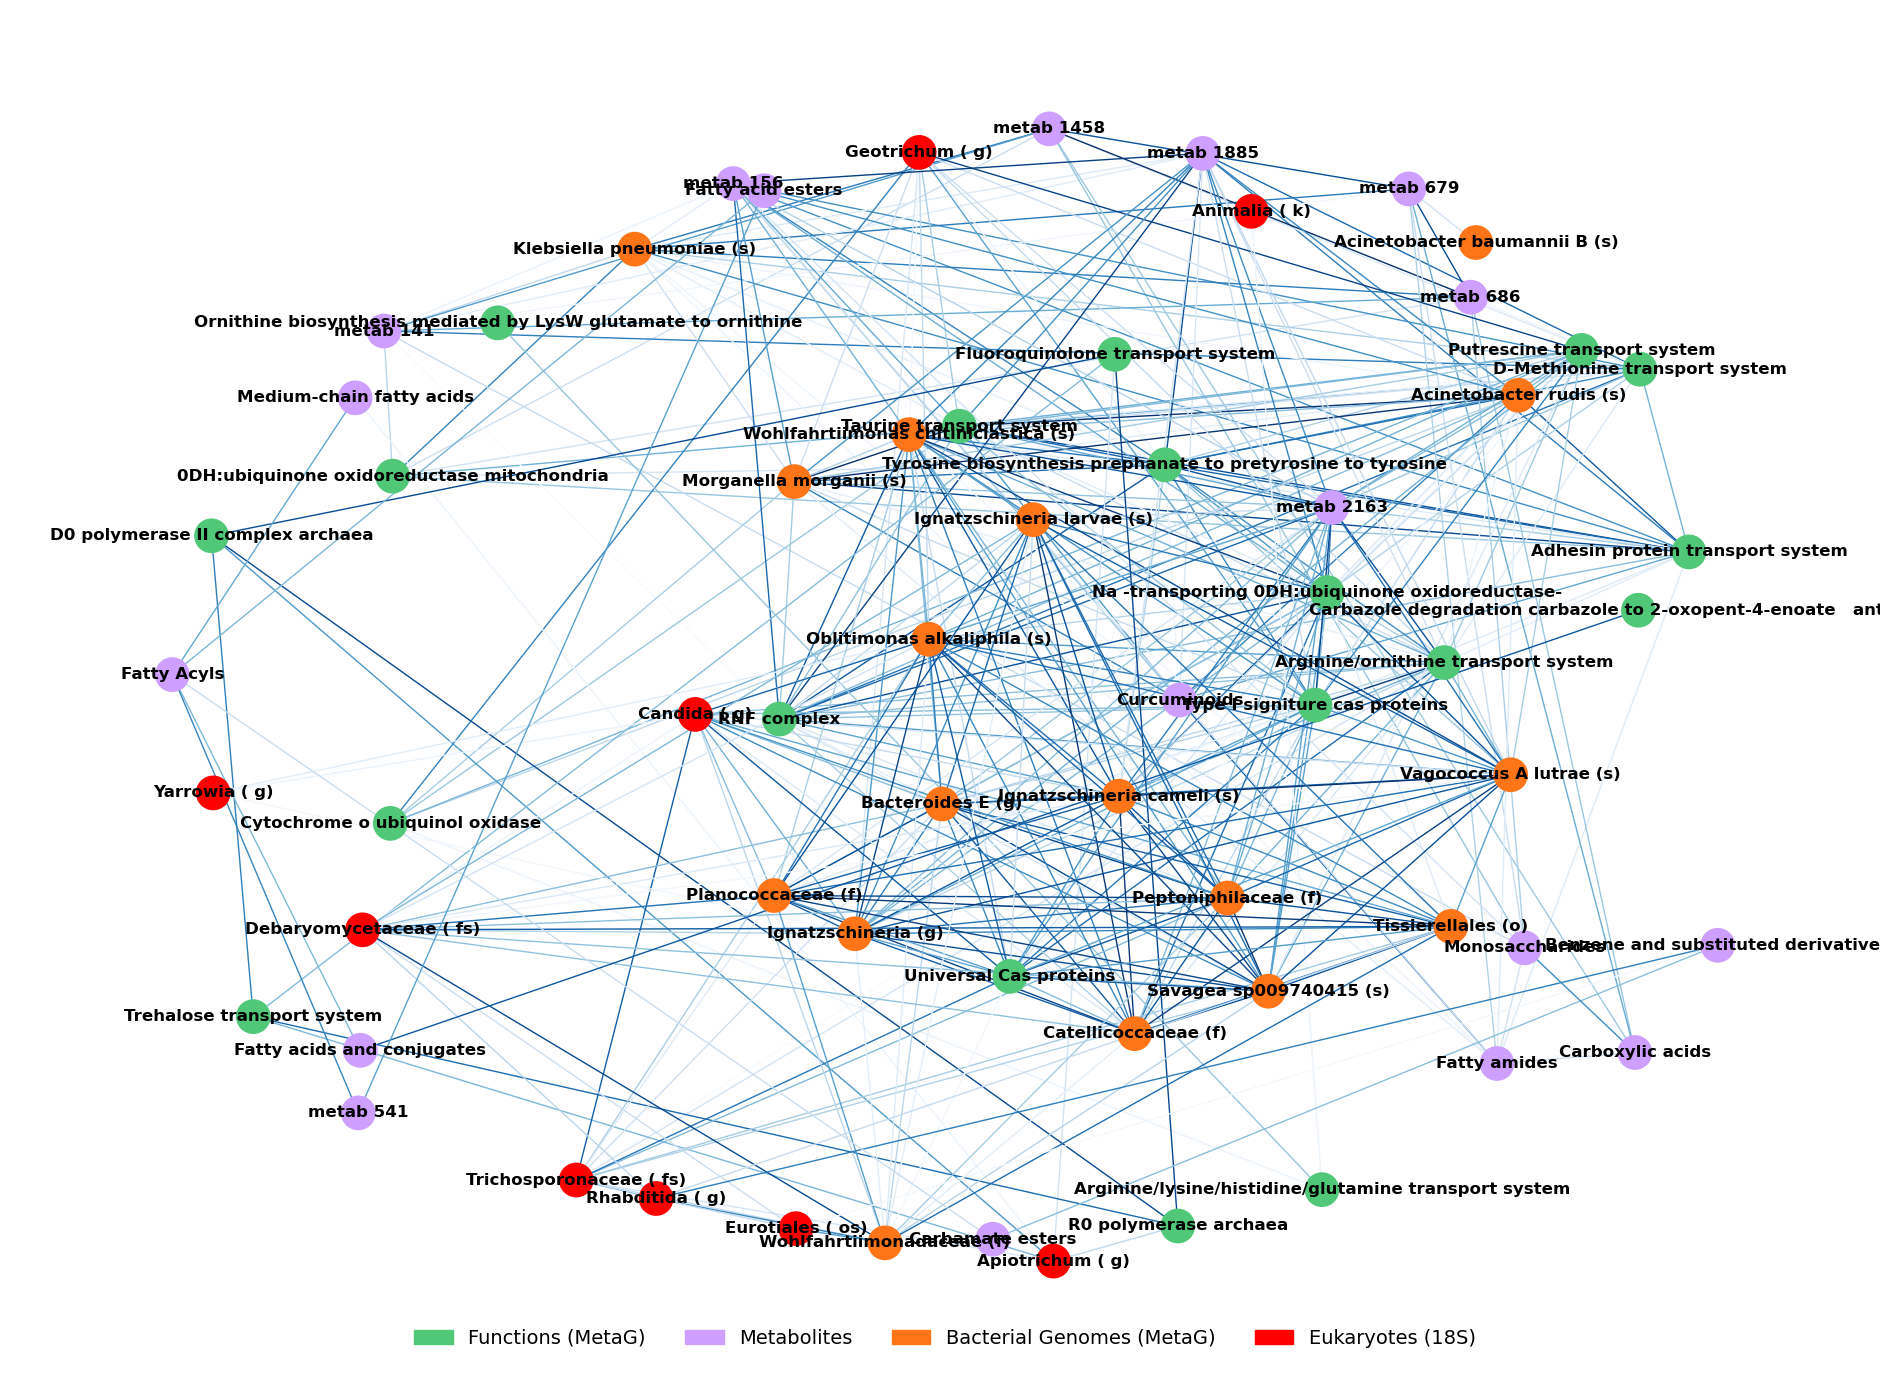

In [18]:
num_iterations = 20

for iteration in range(num_iterations):

    # Build your graph
    G = nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
    # Plot the network:
    values = range(links_filtered.shape[0])


    #pos = nx.kamada_kawai_layout(G)
    pos = nx.spring_layout(G, k=1.8)

    fig, ax = plt.subplots(1, 1, figsize=(19, 14)) 

    y_off = 3

    nx.draw(G, with_labels=True,
            pos = {k:([v[0], v[1]+y_off]) for k,v in pos.items()},
            node_color=[color_map[modality_map_label[node[0]]]
                        for node in G.nodes(data=True)], 
            node_size=[assoc_map_label[node[0]]*4
                        for node in G.nodes(data=True)], 
            #node_size=400,
            edge_color=[abs(feature_feature_correlation_subset_relabel.loc[u, v])
                        for u, v in G.edges],
            edge_cmap= plt.cm.Blues,
            linewidths=5,
            width=1,
            font_size=12, font_weight='bold', ax=ax)


    handles_ = [mpatches.Patch(color=c_, label=modality_) for modality_, c_ in color_map.items()]
    legend = ax.legend(handles=handles_, loc='upper center', bbox_to_anchor=(0.5, 0.05),
               prop={'size':14},
               title="",
               fancybox=True,
                        framealpha=.0,
               ncol=4, markerscale=1.5)
    legend.get_title().set_fontsize('16')
    # increase the line width in the legend 
    for line in legend.get_lines()[:]:
        line.set_linewidth(2.0)
    for line in legend.get_lines()[:]:
        line.set_linewidth(2.0)

    plt.tight_layout()

    #plt.savefig(f'../results/figures/advanced-network-{iteration}.png',
    #            dpi=600, 
    #            bbox_inches='tight',
    #            edgecolor='none')
    
    if iteration == 0:
        plt.show()
    else:
        plt.close()

# RPCA Network (Within-Modality)

### Version 1: Paper's RCPA ordination results

In [2]:
# import tables data 
metadata_subset = pd.read_csv('../network/split-matched-data/metadata.tsv', sep='\t', index_col=0)

# import the rest
all_tables = {'mag':'../network/split-matched-data/mag.biom',
              'metabolite':'../network/split-matched-data/metabolite.biom'}
all_ordinations = {'mag': OrdinationResults.read('../results/joint-rpca/Original/mag_ord.txt'),
                   'metabolite': OrdinationResults.read('../results/joint-rpca/Original/metabolite_ord.txt')}
axis_use = 2 # use PC3 for both

tables = {}
for table_id, table_ in all_tables.items():
    #load table
    bt_tmp = load_table(table_)
    bt_tmp_df = pd.DataFrame(bt_tmp.matrix_data.toarray(), bt_tmp.ids('observation'), bt_tmp.ids())
    bt_tmp_df = bt_tmp_df[metadata_subset.index]
    #load ordination
    ord = all_ordinations[table_id]
    ord_feats = ord.features.copy()
    #make sure the ordination is in the same order as the table
    id_set = set(ord_feats.index) & set(bt_tmp.ids('observation'))
    ord_feats_tmp = ord_feats.loc[list(id_set), :]
    ord_feats_tmp = ord_feats_tmp.sort_values(by=axis_use)
    tables[table_id] = [bt_tmp, bt_tmp_df, ord_feats_tmp]

In [3]:
cats_of_interest = ['facility', 'season', 'add_0c_group']
kw_df_all = []
n_PCs=3 
for cat_of_interest in cats_of_interest:

    kw_df_cat = pd.DataFrame()

    for tblid, ord_ in all_ordinations.items(): 
        ord_samples = ord_.samples.rename(columns={0:"PC1", 1:"PC2", 
                                                   2:"PC3", 3:"PC4"})
        ord_plt = pd.concat([ord_samples, metadata_subset], axis=1, sort=True)
        #drop rows with nan values
        ord_plt = ord_plt.dropna()
        kw_h = []
        kw_p = []

        df_index = []
        for i in range(n_PCs):
            grouped = ord_plt.groupby(cat_of_interest)["PC%i" % (i+1)]
            groups = [group for _, group in grouped]
            # Perform the Kruskal-Wallis test
            h, p = kruskal(*groups)
            kw_h.append(h)
            kw_p.append(p)
            df_index.append("{}_PC{}".format(tblid, i+1))

        kw_df_i = pd.DataFrame(list(zip(kw_h, kw_p)), columns=['H-statistic', 'p-value'], 
                                index=df_index)
        kw_df_cat = pd.concat([kw_df_cat, kw_df_i])

    kw_df_all.append(kw_df_cat)

kw_df_all = pd.concat(kw_df_all, axis=1, keys=cats_of_interest)

h_stage = kw_df_all[('add_0c_group', 'H-statistic')]
h_season = kw_df_all[('season', 'H-statistic')]
h_facility = kw_df_all[('facility', 'H-statistic')]
kw_df_all[('Stage - Both', 'H-statistic')] = h_stage - (h_season + h_facility) 
kw_df_all

facility                    season                \
               H-statistic       p-value H-statistic       p-value   
mag_PC1         219.418480  2.258824e-48   30.852523  9.130475e-07   
mag_PC2         274.409683  2.586393e-60   44.087142  1.446207e-09   
mag_PC3         126.523778  3.355141e-28   21.859008  6.978906e-05   
metabolite_PC1   15.581948  4.134499e-04   72.802380  1.071578e-15   
metabolite_PC2   26.909432  1.434468e-06   20.862341  1.124383e-04   
metabolite_PC3   14.244524  8.069395e-04   56.185442  3.835053e-12   

               add_0c_group               Stage - Both  
                H-statistic       p-value  H-statistic  
mag_PC1           41.911506  4.189415e-09  -208.359498  
mag_PC2           17.860424  4.699862e-04  -300.636400  
mag_PC3           64.774044  5.606498e-14   -83.608743  
metabolite_PC1    11.382883  9.825812e-03   -77.001445  
metabolite_PC2     5.808234  1.213221e-01   -41.963540  
metabolite_PC3     3.135028  3.712715e-01   -67.294938

In [4]:
taxonomy_mag = pd.read_csv('../network/annotations/MAG_taxonomy.tsv', sep='\t', index_col=0)
taxonomy_mag = {k:{z.split('__')[0]:z.split('__')[-1]
               for z in x.split(';')} for k, x in zip(taxonomy_mag.index, taxonomy_mag.Taxon.values)}
taxonomy_mag = pd.DataFrame(taxonomy_mag).T
taxonomy_mag[taxonomy_mag == ''] = np.nan

In [5]:
metab_ids = pd.read_excel('../network/metabolite_formulas.xlsx', index_col=0)
metab_ids.index = ['metab_' + str(x) for x in metab_ids.index]
metab_ids_class = metab_ids.dropna(subset=['most specific class'])

bt_tmp, df_tmp, ord_tmp = tables['metabolite']
keep_metab = set(metab_ids_class.index) & set(bt_tmp.ids('observation'))
bt_tmp = bt_tmp.filter(keep_metab, axis='observation')
df_tmp = df_tmp.loc[list(keep_metab), :]
ord_tmp = ord_tmp.loc[list(keep_metab), :].sort_values(by=axis_use)
tables['metabolite'] = [bt_tmp, df_tmp, ord_tmp]

In [6]:
ord_mag = OrdinationResults.read('../results/joint-rpca/Original/mag_ord.txt')
ord_metab = OrdinationResults.read('../results/joint-rpca/Original/metabolite_ord.txt')

In [7]:
# make each log-ratio based on axis
quantile_use = 0.1
features_used_all = {}
lr_cols = []
metadata_logratios = metadata_subset.copy()
for modality, (_, table_, ranks_) in tables.items():
    for i_ in range(1, 1500):
        num = ranks_.iloc[:i_, :].index
        den = ranks_.iloc[-i_:, :].index
        features_used_all[modality] = [num[:19], den[:19]]
        lr_ = np.log(table_.loc[num, :].sum(0)) - np.log(table_.loc[den, :].sum(0))
        if (sum(np.isfinite(lr_)) / table_.shape[1]) >= 0.99:
            break
    print(modality)
    print(i_)
    print(sum(np.isfinite(lr_)) / table_.shape[1])
    lr_[~np.isfinite(lr_)] = np.nan
    metadata_logratios[modality + '_logratio'] = lr_
    lr_cols.append(modality + '_logratio')

mag
14
0.9919786096256684
metabolite
117
0.9973262032085561


In [8]:
feature_corr_mag = feature_correlation_table(ord_mag)
feature_corr_metab = feature_correlation_table(ord_metab)

In [11]:
new_index = []

for ind_ in feature_corr_mag.index:
    
    label_ = taxonomy_mag.loc[ind_, :].dropna()
    label_ = label_.values[-1] + ' (' + label_.index[-1] + ')'
    new_index.append(label_)    
        
# clean up
new_index = ['drop' if len(str(i_)) == 0 else i_ for i_ in new_index]
new_index = ['drop' if str(i_) == 'nan' else i_ for i_ in new_index]
new_index = [i_.replace('_',' ') for i_ in new_index]

# group
feature_corr_mag_relabel = feature_corr_mag.copy()
feature_corr_mag_relabel['new_label'] = new_index
old_to_new_index = dict(zip(feature_corr_mag_relabel.new_label, 
                             feature_corr_mag_relabel.index))
feature_corr_mag_relabel = feature_corr_mag_relabel.groupby('new_label').mean().T
feature_corr_mag_relabel['new_label'] = new_index
feature_corr_mag_relabel = feature_corr_mag_relabel.groupby('new_label').mean().T
feature_corr_mag_relabel.index.name = 'axis1'
feature_corr_mag_relabel.columns.name = 'axis2'
if 'drop' in feature_corr_mag_relabel.index: 
    feature_corr_mag_relabel = feature_corr_mag_relabel.drop(['drop'], axis=1).drop(['drop'], axis=0)

In [12]:
feature_corr_mag_relabel

axis2                                 2011-GWC2-44-17 (g)  70-9 (f)  AV80 (g)  \
axis1                                                                           
2011-GWC2-44-17 (g)                              1.000000 -0.700831 -0.313368   
70-9 (f)                                        -0.700831  0.993685  0.869149   
AV80 (g)                                        -0.313368  0.869149  1.000000   
Acidovorax F (g)                                 0.333842 -0.471052 -0.191169   
Acinetobacter (g)                               -0.392143  0.005249 -0.241881   
...                                                   ...       ...       ...   
Wohlfahrtiimonadaceae (f)                       -0.808266  0.633689  0.195189   
Wohlfahrtiimonas (g)                             0.153270  0.570833  0.766974   
Wohlfahrtiimonas chitiniclastica (s)            -0.838176  0.563057  0.095357   
Xanthobacteraceae (f)                           -0.037675 -0.146234  0.030475   
Yimella (g)                                      0.781895 -0.310087  0.181102   

axis2                                 Acidovorax F (g)  Acinetobacter (g)  \
axis1                                                                       
2011-GWC2-44-17 (g)                           0.333842          -0.392143   
70-9 (f)                                     -0.471052           0.005249   
AV80 (g)                                     -0.191169          -0.241881   
Acidovorax F (g)                              1.000000          -0.061394   
Acinetobacter (g)                            -0.061394           0.302672   
...                                                ...                ...   
Wohlfahrtiimonadaceae (f)                    -0.813703           0.318914   
Wohlfahrtiimonas (g)                         -0.486632          -0.407779   
Wohlfahrtiimonas chitiniclastica (s)         -0.748030           0.377370   
Xanthobacteraceae (f)                         0.922996           0.043972   
Yimella (g)                                   0.567852          -0.465343   

axis2                                 Acinetobacter baumannii B (s)  \
axis1                                                                 
2011-GWC2-44-17 (g)                                       -0.637260   
70-9 (f)                                                  -0.089666   
AV80 (g)                                                  -0.456797   
Acidovorax F (g)                                           0.169786   
Acinetobacter (g)                                          0.527967   
...                                                             ...   
Wohlfahrtiimonadaceae (f)                                  0.357925   
Wohlfahrtiimonas (g)                                      -0.857804   
Wohlfahrtiimonas chitiniclastica (s)                       0.480143   
Xanthobacteraceae (f)                                      0.350673   
Yimella (g)                                               -0.682260   

axis2                                 Acinetobacter gerneri (s)  \
axis1                                                             
2011-GWC2-44-17 (g)                                   -0.179766   
70-9 (f)                                              -0.557144   
AV80 (g)                                              -0.777348   
Acidovorax F (g)                                       0.436401   
Acinetobacter (g)                                      0.424031   
...                                                         ...   
Wohlfahrtiimonadaceae (f)                             -0.060909   
Wohlfahrtiimonas (g)                                  -0.998397   
Wohlfahrtiimonas chitiniclastica (s)                   0.076256   
Xanthobacteraceae (f)                                  0.432934   
Yimella (g)                                           -0.370003   

axis2                                 Acinetobacter pullicarnis (s)  \
axis1                                                                 
2011-G

In [16]:
to_search = ['alkaliphila', 'ignatzschineria', 'acinetobacter', 
             'savagea', 'lutrae', 'morganii']

for feature in feature_corr_mag_relabel.index:
    if any([x in feature.lower() for x in to_search]):
        print(feature)

Acinetobacter (g)
Acinetobacter baumannii B (s)
Acinetobacter gerneri (s)
Acinetobacter pullicarnis (s)
Acinetobacter rudis (s)
Ignatzschineria (g)
Ignatzschineria cameli (s)
Ignatzschineria larvae (s)
Morganella morganii (s)
Oblitimonas alkaliphila (s)
Savagea (g)
Savagea serpentis (s)
Savagea sp009740415 (s)
Vagococcus A lutrae (s)


In [18]:
mags_of_interest = ['Oblitimonas alkaliphila (s)', 'Ignatzschineria (g)', 'Acinetobacter rudis (s)',
                    'Morganella morganii (s)',  'Bacteroides E (g)', 'Ignatzschineria cameli (s)', 
                    'Savagea (g)', 'Savagea sp009740415 (s)']

#subset for the mags of interest
feature_corr_mag_relabel.loc[mags_of_interest, mags_of_interest]

axis2                        Oblitimonas alkaliphila (s)  Ignatzschineria (g)  \
axis1                                                                           
Oblitimonas alkaliphila (s)                     1.000000             0.979781   
Ignatzschineria (g)                             0.979781             0.992729   
Acinetobacter rudis (s)                         0.997326             0.963947   
Morganella morganii (s)                         0.992813             0.956472   
Bacteroides E (g)                               0.979115             0.983365   
Ignatzschineria cameli (s)                      0.990327             0.992967   
Savagea (g)                                     0.943510             0.972740   
Savagea sp009740415 (s)                         0.991111             0.991592   

axis2                        Acinetobacter rudis (s)  Morganella morganii (s)  \
axis1                                                                           
Oblitimonas alkaliphila (s)                 0.997326                 0.992813   
Ignatzschineria (g)                         0.963947                 0.956472   
Acinetobacter rudis (s)                     1.000000                 0.996983   
Morganella morganii (s)                     0.996983                 1.000000   
Bacteroides E (g)                           0.967157                 0.968675   
Ignatzschineria cameli (s)                  0.978735                 0.976678   
Savagea (g)                                 0.921222                 0.906124   
Savagea sp009740415 (s)                     0.980413                 0.979241   

axis2                        Bacteroides E (g)  Ignatzschineria cameli (s)  \
axis1                                                                        
Oblitimonas alkaliphila (s)           0.979115                    0.990327   
Ignatzschineria (g)                   0.983365                    0.992967   
Acinetobacter rudis (s)               0.967157                    0.978735   
Morganella morganii (s)               0.968675                    0.976678   
Bacteroides E (g)                     0.987990                    0.992738   
Ignatzschineria cameli (s)            0.992738                    1.000000   
Savagea (g)                           0.950220                    0.962801   
Savagea sp009740415 (s)               0.992916                    0.999838   

axis2                        Savagea (g)  Savagea sp009740415 (s)  
axis1                                                              
Oblitimonas alkaliphila (s)     0.943510                 0.991111  
Ignatzschineria (g)             0.972740                 0.991592  
Acinetobacter rudis (s)         0.921222                 0.980413  
Morganella morganii (s)         0.906124                 0.979241  
Bacteroides E (g)               0.950220                 0.992916  
Ignatzschineria cameli (s)      0.962801                 0.999838  
Savagea (g)                     0.968458                 0.959617  
Savagea sp009740415 (s)         0.959617                 0.999900

In [10]:
all_features_mag = set([v_ for k_, (v1, v2) in features_used_all.items()
                          for v_ in list(v1)]) & set(feature_corr_mag.index)
feature_corr_mag_subset = feature_corr_mag.loc[list(all_features_mag), 
                                               list(all_features_mag)]
feature_corr_mag_subset

featureid            UTK_active.final.8  UTK.bins.27  UTK.bins.84  \
featureid                                                           
UTK_active.final.8             1.000000     0.807097     0.995562   
UTK.bins.27                    0.807097     1.000000     0.852518   
UTK.bins.84                    0.995562     0.852518     1.000000   
UTK_active.final.44            0.980452     0.886442     0.984463   
UTK.bins.61                    0.992268     0.851424     0.990989   
UTK.bins.114                   0.980930     0.893913     0.987025   
UTK.bins.53                    0.915154     0.958419     0.935133   
SHSU.bins.186                  0.714343     0.487254     0.728926   
UTK.bins.183                   0.995941     0.839758     0.999514   
UTK.bins.113                   0.995539     0.748209     0.982835   
SHSU.bins.399                 -0.119367    -0.051546    -0.068633   
UTK.bins.192                   0.971337     0.904567     0.978589   
UTK.bins.55                    0.949346     0.905669     0.955544   
SHSU.bins.240                 -0.122112    -0.106949    -0.078733   

featureid            UTK_active.final.44  UTK.bins.61  UTK.bins.114  \
featureid                                                             
UTK_active.final.8              0.980452     0.992268      0.980930   
UTK.bins.27                     0.886442     0.851424      0.893913   
UTK.bins.84                     0.984463     0.990989      0.987025   
UTK_active.final.44             1.000000     0.996815      0.999626   
UTK.bins.61                     0.996815     1.000000      0.996110   
UTK.bins.114                    0.999626     0.996110      1.000000   
UTK.bins.53                     0.974704     0.953850      0.975809   
SHSU.bins.186                   0.598839     0.634491      0.614159   
UTK.bins.183                    0.978788     0.987496      0.981624   
UTK.bins.113                    0.962299     0.980861      0.961367   
SHSU.bins.399                  -0.216626    -0.200872     -0.191441   
UTK.bins.192                    0.998990     0.992242      0.998918   
UTK.bins.55                     0.992251     0.980852      0.990445   
SHSU.bins.240                  -0.234109    -0.211533     -0.209946   

featureid            UTK.bins.53  SHSU.bins.186  UTK.bins.183  UTK.bins.113  \
featureid                                                                     
UTK_active.final.8      0.915154       0.714343      0.995941      0.995539   
UTK.bins.27             0.958419       0.487254      0.839758      0.748209   
UTK.bins.84             0.935133       0.728926      0.999514      0.982835   
UTK_active.final.44     0.974704       0.598839      0.978788      0.962299   
UTK.bins.61             0.953850       0.634491      0.987496      0.980861   
UTK.bins.114            0.975809       0.614159      0.981624      0.961367   
UTK.bins.53             1.000000       0.491802      0.923847      0.878001   
SHSU.bins.186           0.491802       1.000000      0.747546      0.717405   
UTK.bins.183            0.923847       0.747546      1.000000      0.985030   
UTK.bins.113            0.878001       0.717405      0.985030      1.000000   
SHSU.bins.399          -0.234040       0.579648     -0.048620     -0.137403   
UTK.bins.192            0.983762       0.579915      0.971766      0.949284   
UTK.bins.55             0.988770       0.500830      0.946125      0.925393   
SHSU.bins.240          -0.270471       0.592997     -0.056673     -0.131729   

featureid            SHSU.bins.399  UTK.bins.192  UTK.bins.55  SHSU.bins.240  
featureid                                                                     
UTK_active.final.8       -0.119367      0.971337     0.949346      -0.122112  
UTK.bins.27              -0.051546      0.904567     0.905669      -0.106949  
UTK.bins.84              -0.068633      0.978589     0.955544      -0.078733  
UTK_active.final.44      -0.216626      0.998990     0.992251      -0.234109  
UTK.bins.61        

In [12]:
feature_corr_mag_subset.shape

(14, 14)

In [11]:
new_index = []
association_map = {}

nums_all = [v_ for k, v in features_used_all.items() for v_ in v[1]]
dens_all = [v_ for k, v in features_used_all.items() for v_ in v[0]]

for ind_ in feature_corr_mag_subset.index:
    
    label_ = taxonomy_mag.loc[ind_, :].dropna()
    label_ = label_.values[-1] + ' (' + label_.index[-1] + ')'
    new_index.append(label_)
    
    if ind_ in nums_all:
        association_map[label_] = 'day zero'
    else:
        association_map[label_] = 'advanced'         
        
# clean up
new_index = ['drop' if len(str(i_)) == 0 else i_ for i_ in new_index]
new_index = ['drop' if str(i_) == 'nan' else i_ for i_ in new_index]
new_index = [i_.replace('_',' ') for i_ in new_index]

# group
feature_corr_mag_subset_relabel = feature_corr_mag_subset.copy()
feature_corr_mag_subset_relabel['new_label'] = new_index
old_to_new_index = dict(zip(feature_corr_mag_subset_relabel.new_label, 
                             feature_corr_mag_subset_relabel.index))
feature_corr_mag_subset_relabel = feature_corr_mag_subset_relabel.groupby('new_label').mean().T
feature_corr_mag_subset_relabel['new_label'] = new_index
feature_corr_mag_subset_relabel = feature_corr_mag_subset_relabel.groupby('new_label').mean().T
feature_corr_mag_subset_relabel.index.name = 'axis1'
feature_corr_mag_subset_relabel.columns.name = 'axis2'
if 'drop' in feature_corr_mag_subset_relabel.index: 
    feature_corr_mag_subset_relabel = feature_corr_mag_subset_relabel.drop(['drop'], axis=1).drop(['drop'], axis=0)

In [36]:
feature_corr_mag_subset_relabel

axis2                     70-9 (f)  Actinomycetia (c)  Bradyrhizobium (g)  \
axis1                                                                       
70-9 (f)                  0.992751           0.959513           -0.084885   
Actinomycetia (c)         0.959513           0.995222           -0.246006   
Bradyrhizobium (g)       -0.084885          -0.246006            1.000000   
DP-20 (g)                 0.986449           0.988481           -0.200872   
Gaiellales (o)            0.731292           0.557494            0.579648   
Kribbellaceae (f)         0.966546           0.997247           -0.220792   
Palsa-504 (g)            -0.089045          -0.267456            0.995936   
Pseudolabrys (g)          0.975183           0.995938           -0.216626   
SKKL01 (f)                0.813495           0.899791           -0.051546   
Solirubrobacteraceae (f)  0.912327           0.982290           -0.234040   
VAZQ01 (g)                0.995681           0.965138           -0.119367   

axis2                     DP-20 (g)  Gaiellales (o)  Kribbellaceae (f)  \
axis1                                                                    
70-9 (f)                   0.986449        0.731292           0.966546   
Actinomycetia (c)          0.988481        0.557494           0.997247   
Bradyrhizobium (g)        -0.200872        0.579648          -0.220792   
DP-20 (g)                  1.000000        0.634491           0.992242   
Gaiellales (o)             0.634491        1.000000           0.579915   
Kribbellaceae (f)          0.992242        0.579915           1.000000   
Palsa-504 (g)             -0.211533        0.592997          -0.242160   
Pseudolabrys (g)           0.996815        0.598839           0.998990   
SKKL01 (f)                 0.851424        0.487254           0.904567   
Solirubrobacteraceae (f)   0.953850        0.491802           0.983762   
VAZQ01 (g)                 0.992268        0.714343           0.971337   

axis2                     Palsa-504 (g)  Pseudolabrys (g)  SKKL01 (f)  \
axis1                                                                   
70-9 (f)                      -0.089045          0.975183    0.813495   
Actinomycetia (c)             -0.267456          0.995938    0.899791   
Bradyrhizobium (g)             0.995936         -0.216626   -0.051546   
DP-20 (g)                     -0.211533          0.996815    0.851424   
Gaiellales (o)                 0.592997          0.598839    0.487254   
Kribbellaceae (f)             -0.242160          0.998990    0.904567   
Palsa-504 (g)                  1.000000         -0.234109   -0.106949   
Pseudolabrys (g)              -0.234109          1.000000    0.886442   
SKKL01 (f)                    -0.106949          0.886442    1.000000   
Solirubrobacteraceae (f)      -0.270471          0.974704    0.958419   
VAZQ01 (g)                    -0.122112          0.980452    0.807097   

axis2                     Solirubrobacteraceae (f)  VAZQ01 (g)  
axis1                                                           
70-9 (f)                                  0.912327    0.995681  
Actinomycetia (c)                         0.982290    0.965138  
Bradyrhizobium (g)                       -0.234040   -0.119367  
DP-20 (g)                                 0.953850    0.992268  
Gaiellales (o)                            0.491802    0.714343  
Kribbellaceae (f)                         0.983762    0.971337  
Palsa-504 (g)                            -0.270471   -0.122112  
Pseudolabrys (g)                          0.974704    0.980452  
SKKL01 (f)                                0.958419    0.807097  
Solirubrobacteraceae (f)                  1.000000    0.915154  
VAZQ01 (g)                                0.915154    1.000000

In [14]:
all_features_metab = set([v_ for k_, (v1, v2) in features_used_all.items()
                          for v_ in list(v1)]) & set(feature_corr_metab.index)
feature_corr_metab_subset = feature_corr_metab.loc[list(all_features_metab), 
                                                   list(all_features_metab)]

In [15]:
new_index = []
association_map = {}

nums_all = [v_ for k, v in features_used_all.items() for v_ in v[0]]
dens_all = [v_ for k, v in features_used_all.items() for v_ in v[1]]

for ind_ in feature_corr_metab_subset.index:
    
    new_index.append(metab_ids.loc[ind_, 'most specific class'])
    if ind_ in nums_all:
        association_map[metab_ids.loc[ind_, 'most specific class']] = 'day zero'
    else:
        association_map[metab_ids.loc[ind_, 'most specific class']] = 'advanced'              
        
# clean up
new_index = ['drop' if len(str(i_)) == 0 else i_ for i_ in new_index]
new_index = ['drop' if str(i_) == 'nan' else i_ for i_ in new_index]
new_index = [i_.replace('_',' ') for i_ in new_index]

# group
feature_corr_metab_subset_relabel = feature_corr_metab_subset.copy()
feature_corr_metab_subset_relabel['new_label'] = new_index
old_to_new_index2 = dict(zip(feature_corr_metab_subset_relabel.new_label, 
                             feature_corr_metab_subset_relabel.index))
feature_corr_metab_subset_relabel = feature_corr_metab_subset_relabel.groupby('new_label').mean().T
feature_corr_metab_subset_relabel['new_label'] = new_index
feature_corr_metab_subset_relabel = feature_corr_metab_subset_relabel.groupby('new_label').mean().T
feature_corr_metab_subset_relabel.index.name = 'axis1'
feature_corr_metab_subset_relabel.columns.name = 'axis2'
if 'drop' in feature_corr_metab_subset_relabel.index: 
    feature_corr_metab_subset_relabel = feature_corr_metab_subset_relabel.drop(['drop'], axis=1).drop(['drop'], axis=0)

In [16]:
feature_corr_metab_subset_relabel

axis2                               Benzoic acid esters  \
axis1                                                     
Benzoic acid esters                            0.965355   
Carboxylic acid esters                        -0.204682   
Carboxylic acids                               0.961889   
Dicarboxylic acids and derivatives             0.308030   
Diterpenoids                                   0.742682   
Fatty acids and conjugates                    -0.298969   
Furofuran lignans                              0.964322   
Heteroaromatic compounds                      -0.553869   
Lineolic acids and derivatives                -0.654905   
Long-chain fatty acids                        -0.160549   
Medium-chain fatty acids                       0.219824   
Phenolic glycosides                            0.725093   
Prenol lipids                                  0.057062   
Triacylglycerols                              -0.810487   

axis2                               Carboxylic acid esters  Carboxylic acids  \
axis1                                                                          
Benzoic acid esters                              -0.204682          0.961889   
Carboxylic acid esters                            1.000000         -0.137575   
Carboxylic acids                                 -0.137575          1.000000   
Dicarboxylic acids and derivatives                0.412648          0.367049   
Diterpenoids                                      0.467684          0.756146   
Fatty acids and conjugates                        0.831331         -0.348307   
Furofuran lignans                                -0.150290          0.999880   
Heteroaromatic compounds                          0.649994         -0.395528   
Lineolic acids and derivatives                    0.612272         -0.728700   
Long-chain fatty acids                            0.457111         -0.127096   
Medium-chain fatty acids                          0.830153          0.206318   
Phenolic glycosides                               0.506231          0.766935   
Prenol lipids                                     0.920642          0.064818   
Triacylglycerols                                  0.632590         -0.835676   

axis2                               Dicarboxylic acids and derivatives  \
axis1                                                                    
Benzoic acid esters                                           0.308030   
Carboxylic acid esters                                        0.412648   
Carboxylic acids                                              0.367049   
Dicarboxylic acids and derivatives                            0.356767   
Diterpenoids                                                  0.529456   
Fatty acids and conjugates                                    0.212652   
Furofuran lignans                                             0.360492   
Heteroaromatic compounds                                      0.176465   
Lineolic acids and derivatives                               -0.051946   
Long-chain fatty acids                                        0.162725   
Medium-chain fatty acids                                      0.454554   
Phenolic glycosides                                           0.560134   
Prenol lipids                                                 0.442840   
Triacylglycerols                                             -0.072227   

axis2                               Diterpenoids  Fatty acids and conjugates  \
axis1                                                                          
Benzoic acid esters                     0.742682                   -0.298969   
Carboxylic acid esters                  0.467684                    0.831331   
Carboxylic acids                        0.756146                   -0.348307   
Dicarboxylic acids and derivatives      0.529456                    0.212652   
Diterpenoids                            1.000000                    0.348289   
Fatty acids and conjugates   

### Version 2: New RCPA ordination results

In [ ]:
##